The effect of testing delays

2 days of presymptomatic and 7.68 days of symptomatic infectiousness (Moss et al 2020)

R0 = 2.53

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
average_number_infections = 2.53
pre_symp_infectious = 2
symp_infectous = 7.68
total_infectious = pre_symp_infectious + symp_infectous
average_infectious_per_day = average_number_infections/total_infectious
print(average_infectious_per_day)

0.26136363636363635


<ipython-input-61-83c445cd372b>:5: RuntimeWarning: divide by zero encountered in true_divide
  ar = 100*(1-1/r0)


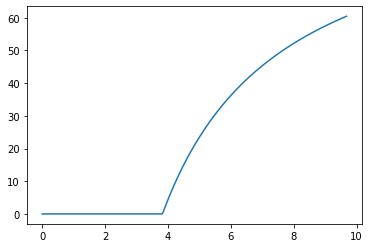

In [61]:
delay_values = np.linspace(0*pre_symp_infectious, total_infectious, 1000)
r_eff = delay_values*average_infectious_per_day

def calc_attack_rate(r0):
    ar = 100*(1-1/r0)
    ar[ar<0] = 0
    return ar

attack_rate = calc_attack_rate(r_eff)
plt.plot(delay_values, attack_rate)
plt.show()

Not every person infects 2.53 people. Some infect 0, some 10.
The result of epidemic growth, however, is equivalent to
each person infectin 2.53 people.

Consider geometric distribution. Mean is 1/p, p = 1/2.53.

<ipython-input-61-83c445cd372b>:5: RuntimeWarning: divide by zero encountered in true_divide
  ar = 100*(1-1/r0)
<ipython-input-61-83c445cd372b>:5: RuntimeWarning: divide by zero encountered in true_divide
  ar = 100*(1-1/r0)


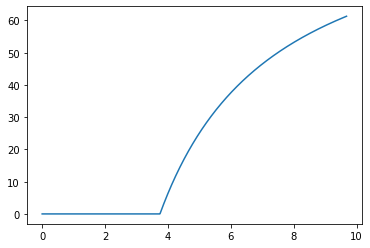

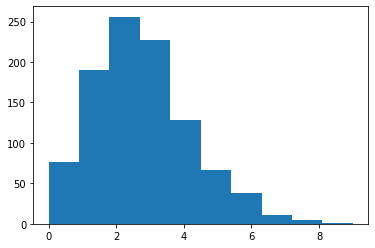

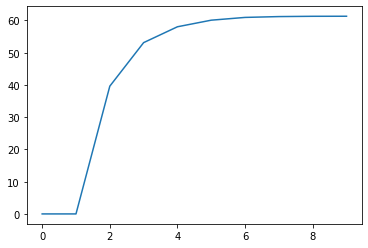

In [66]:
geom = np.random.geometric
poisson = np.random.poisson

#generate 1000 people with different infectiousness
p = 1/(average_number_infections)
inf_array = geom(p, 1000) - 1
inf_array = poisson(average_number_infections, size = 1000)
onwards_infections_array = [inf_array*delay_value/total_infectious for
                      delay_value in delay_values]
ave_onwards_infections = np.array([np.mean(onwards_infections) for onwards_infections in
                          onwards_infections_array])

attack_rate = calc_attack_rate(ave_onwards_infections)
plt.plot(delay_values, attack_rate)
plt.show()

plt.hist(inf_array)
plt.show()

def enforce_max_new_infections(infections_array, max_new):
    output = []
    if type(max_new) is int:
        max_new = [max_new]
    for max_n in max_new:
        output.append(
            [i if i < max_n else max_n for i in infections_array]
        )
    return output

max_inf_array = list(range(10))
new_infections_array = enforce_max_new_infections(inf_array,
                                                  max_inf_array)
ave_onwards_infections = np.array([np.mean(onwards_infections) for onwards_infections in
                          new_infections_array])

attack_rate = calc_attack_rate(ave_onwards_infections)
plt.plot(max_inf_array, attack_rate)
plt.show()